In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
messages = pd.read_json('ibm.json')
messages

,Article,Date,Link
0,IBM Study: C-Suite Executives Declare One-Vend...,2021-10-28,https://newsroom.ibm.com/2021-10-28-IBM-Study-...
1,IBM Acquires Leading Adobe Workfront Consultancy,2021-10-19,https://newsroom.ibm.com/2021-10-19-IBM-Acquir...
2,Virgin Megastore in Saudi Arabia to Accelerate...,2021-10-13,https://newsroom.ibm.com/2021-10-13-Virgin-Meg...
3,IBM Reports 2021 Third-Quarter Results,2021-10-20,https://newsroom.ibm.com/2021-10-20-IBM-Report...
4,Leading Financial Institutions Publish Detaile...,2021-10-19,https://newsroom.ibm.com/2021-10-19-Leading-Fi...
...,...,...,...
3974,National Bank Financial Group Signs CDN$450-Mi...,2009-04-16,https://newsroom.ibm.com/2009-04-16-National-B...
3975,IBM Introduces Products and Services to Combat...,2009-04-21,https://newsroom.ibm.com/2009-04-21-IBM-Introd...
3976,Equifax Extends Technology Services Agreement ...,2009-04-17,https://newsroom.ibm.com/2009-04-17-Equifax-Ex...
3977,HDFC Bank Appoints IBM to Support Business Growth,2009-04-21,https://newsroom.ibm.com/2009-04-21-HDFC-Bank-...


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [6]:
message_text = str(messages.Article.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

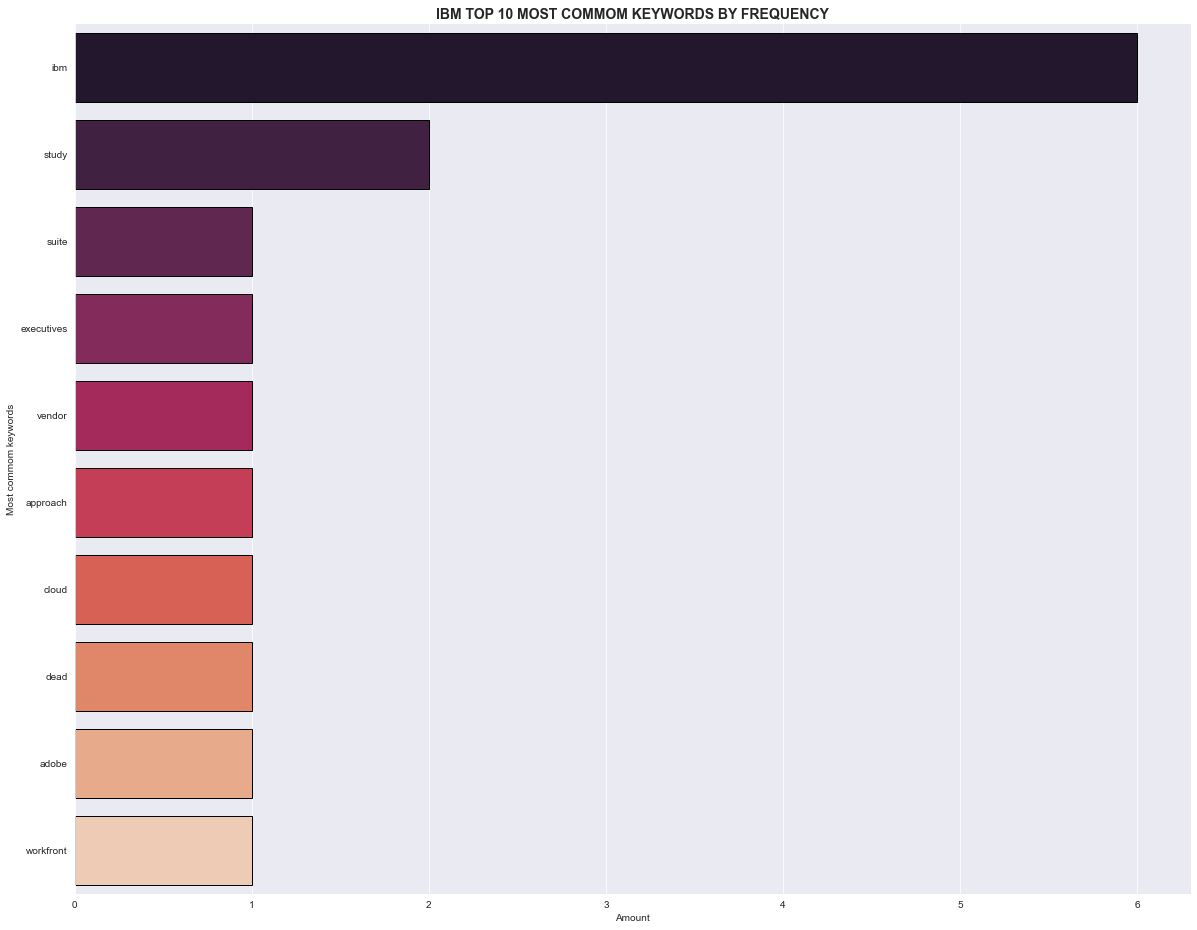

In [7]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('IBM TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('ibm_keywords.png')

In [8]:
doc = list(nlp(message_text).noun_chunks)

In [11]:
import sys

orig_stdout = sys.stdout
f = open('ibm.txt', 'w')
sys.stdout = f


for token in doc:
    if 'IBM' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [17]:
df = pd.read_table(
    'ibm.txt', 
    header=None
)
df.rename(
    columns={
        0: 'IBM'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.IBM.value_counts()
).rename(
    columns={'IBM': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()


,Frequency
Term,
IBM,2
Dead',1
'IBM Acquires,1
'New IBM Study Highlights Exploding Demand,1


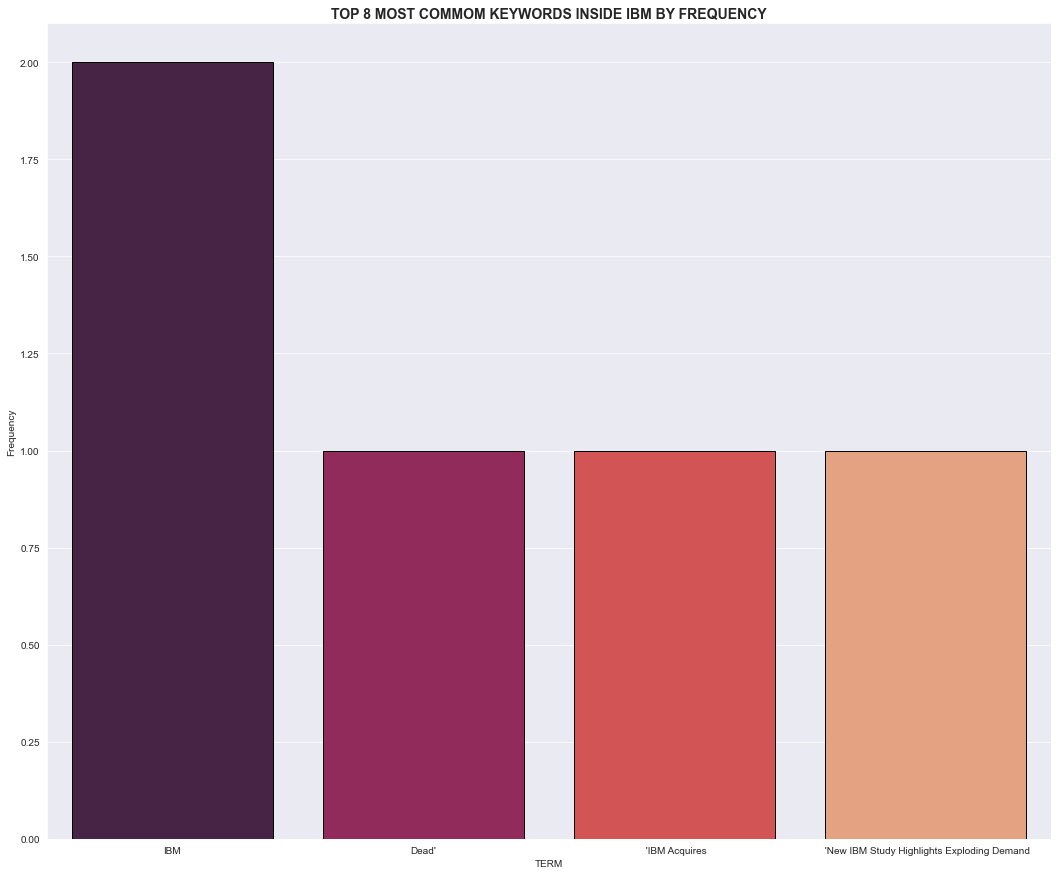

In [18]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:8], 
    x=dff.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE IBM BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [22]:
orig_stdout = sys.stdout
f = open('study.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Study' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [33]:
df = pd.read_table(
    'ibm.txt', 
    header=None
)
df.rename(
    columns={
        0: 'Study'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.Study.value_counts()
).rename(
    columns={'Study': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()


,Frequency
Term,
IBM,2
Dead',1
'IBM Acquires,1
'New IBM Study Highlights Exploding Demand,1


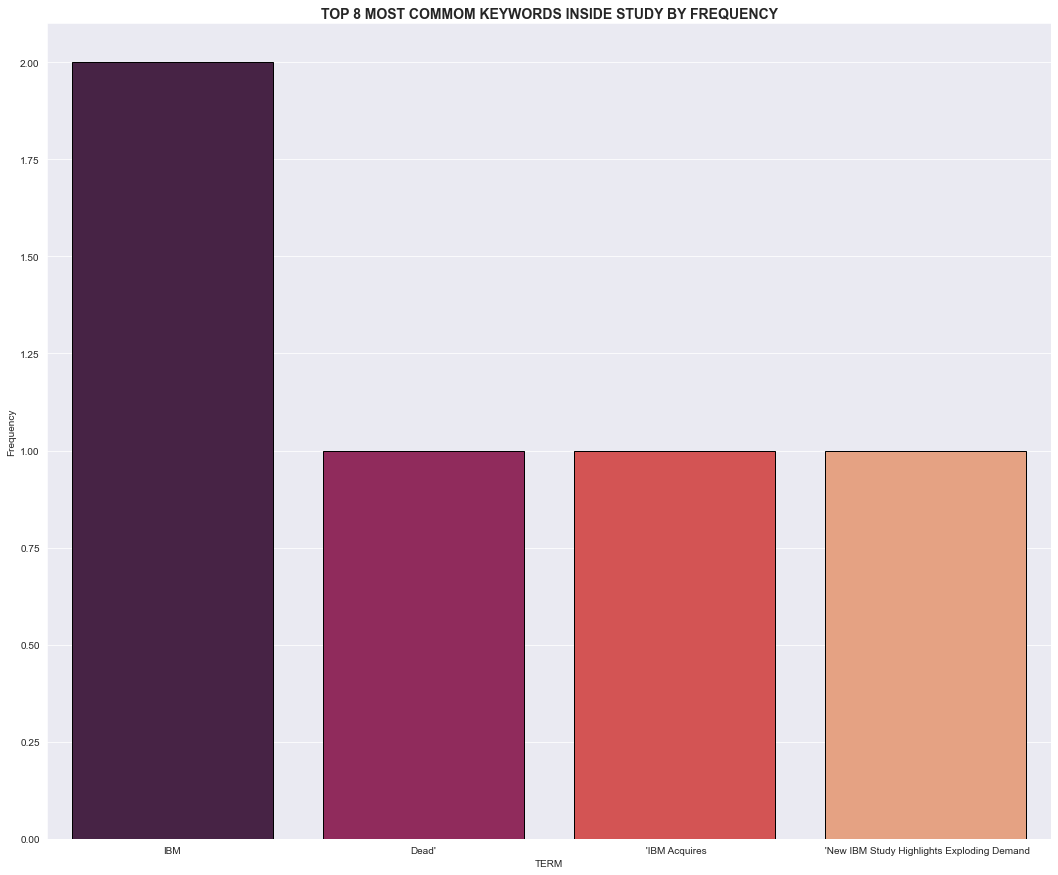

In [34]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:8], 
    x=dff.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE STUDY BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)


In [29]:
orig_stdout = sys.stdout
f = open('suite.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Suite' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [30]:
df2 = pd.read_table(
    'suite.txt', 
    header=None
)
df2.rename(
    columns={
        0: 'Suite'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.Suite.value_counts()
).rename(
    columns={'Suite': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()


,Frequency
Term,
C-Suite Executives,1


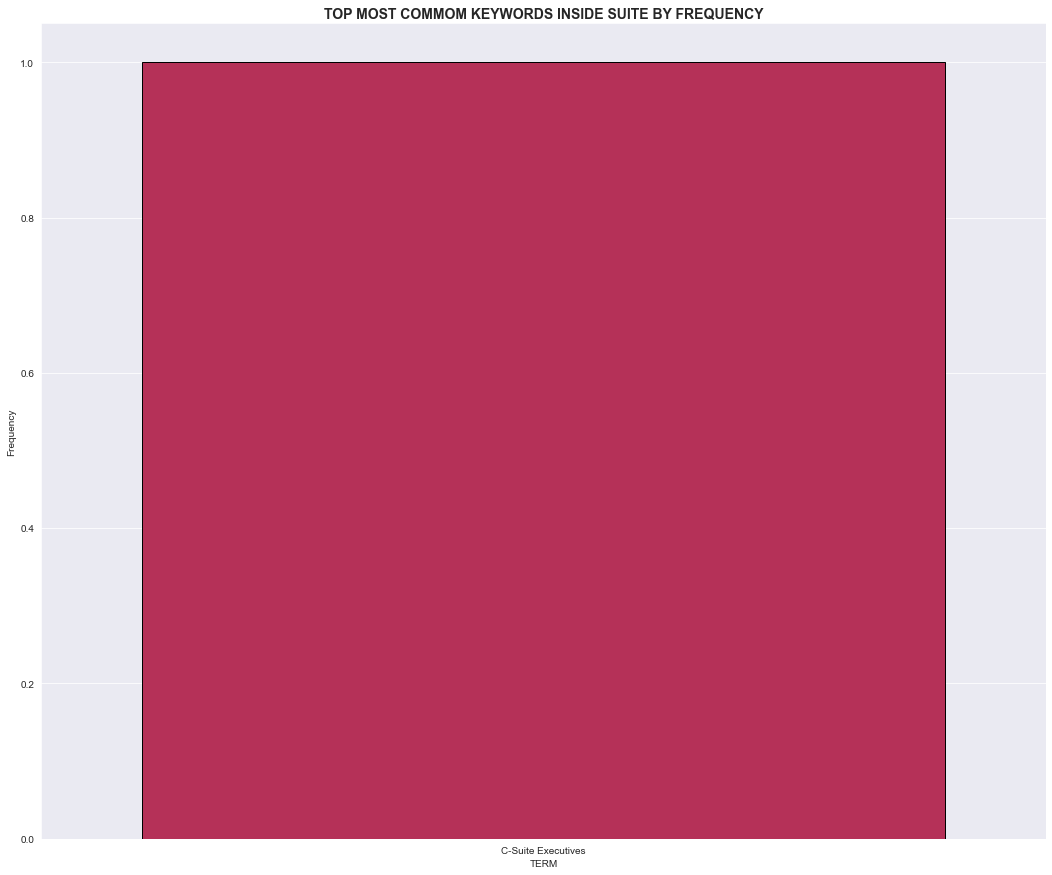

In [35]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:8], 
    x=dff2.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE SUITE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [39]:
orig_stdout = sys.stdout
f = open('vendor.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Vendor' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [40]:
df3 = pd.read_table(
    'vendor.txt', 
    header=None
)
df3.rename(
    columns={
        0: 'Vendor'
    },
    inplace=True, 
    errors='raise'
)
dff3 = pd.DataFrame(
    data=df3.Vendor.value_counts()
).rename(
    columns={'Vendor': 'Frequency'}
).rename_axis(
    'Term'
)
dff3.head()

,Frequency
Term,
One-Vendor Approach,1


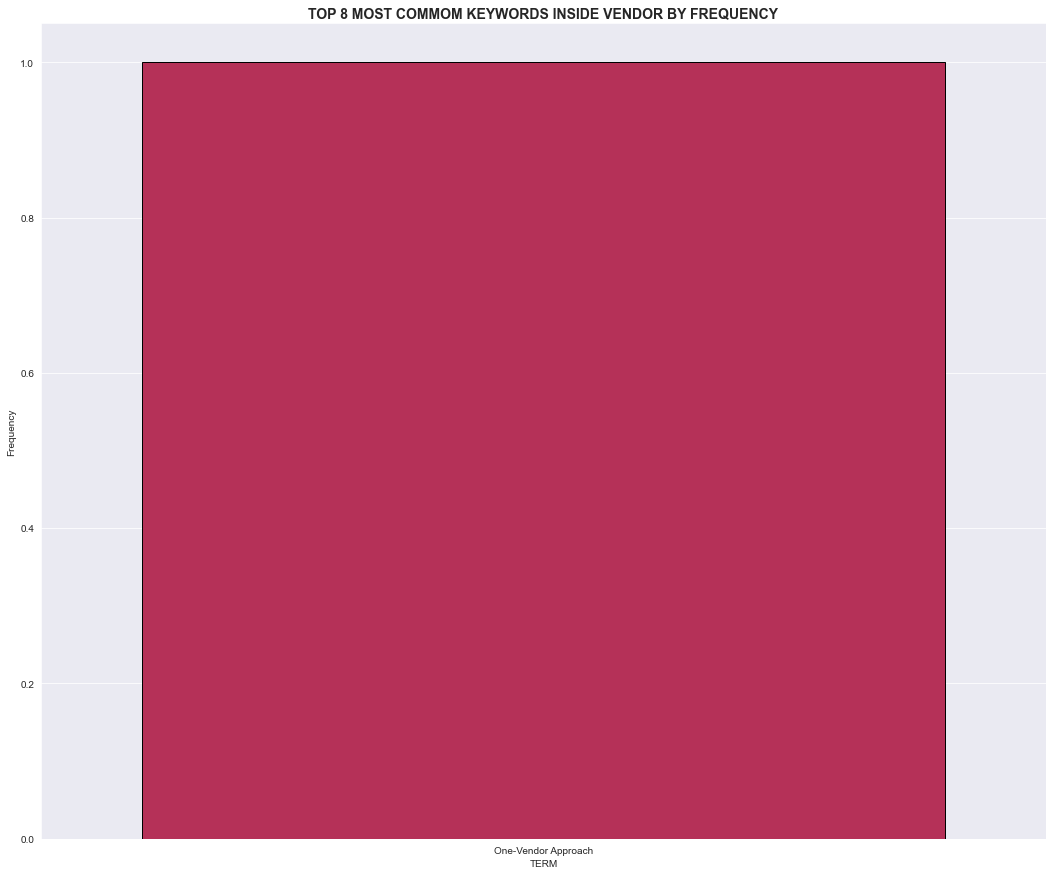

In [41]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff3[:8], 
    x=dff3.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE VENDOR BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_commom_keyword.png'
)

In [45]:
orig_stdout = sys.stdout
f = open('cloud.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Cloud' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [46]:
df4 = pd.read_table(
    'cloud.txt', 
    header=None
)
df4.rename(
    columns={
        0: 'Cloud'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.Cloud.value_counts()
).rename(
    columns={'Cloud': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
Cloud,1


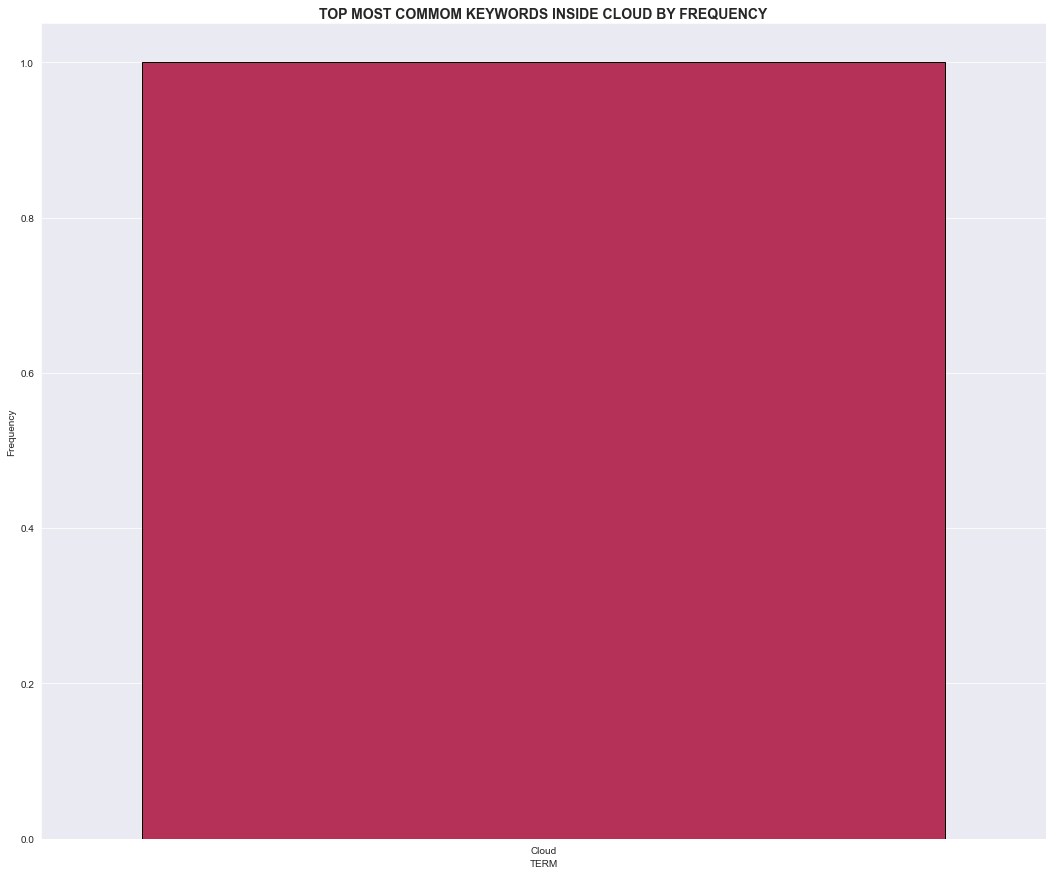

In [47]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:8], 
    x=dff4.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE CLOUD BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)

In [50]:
orig_stdout = sys.stdout
f = open('dead.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Dead' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [51]:
df5 = pd.read_table(
    'dead.txt', 
    header=None
)
df5.rename(
    columns={
        0: 'Dead'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.Dead.value_counts()
).rename(
    columns={'Dead': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()


,Frequency
Term,
Dead',1
'IBM Acquires,1


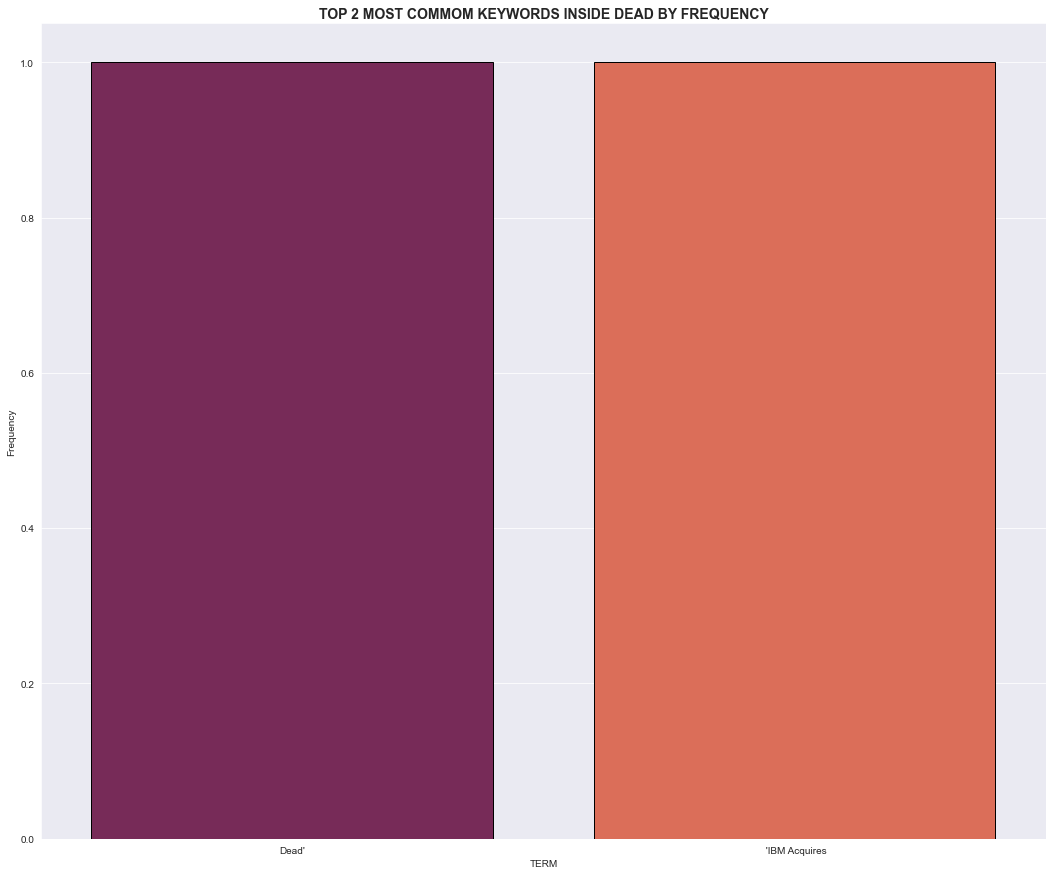

In [52]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:8], 
    x=dff5.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 2 MOST COMMOM KEYWORDS INSIDE DEAD BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fifth_most_commom_keyword.png'
)

In [53]:
orig_stdout = sys.stdout
f = open('adobe.txt', 'w')
sys.stdout = f


for token in doc:
    if 'Adobe' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [55]:
df6 = pd.read_table(
    'adobe.txt', 
    header=None
)
df6.rename(
    columns={
        0: 'Adobe'
    },
    inplace=True, 
    errors='raise'
)
dff6 = pd.DataFrame(
    data=df6.Adobe.value_counts()
).rename(
    columns={'Adobe': 'Frequency'}
).rename_axis(
    'Term'
)
dff6.head()

,Frequency
Term,
Adobe Workfront Consultancy',1
'Virgin Megastore,1


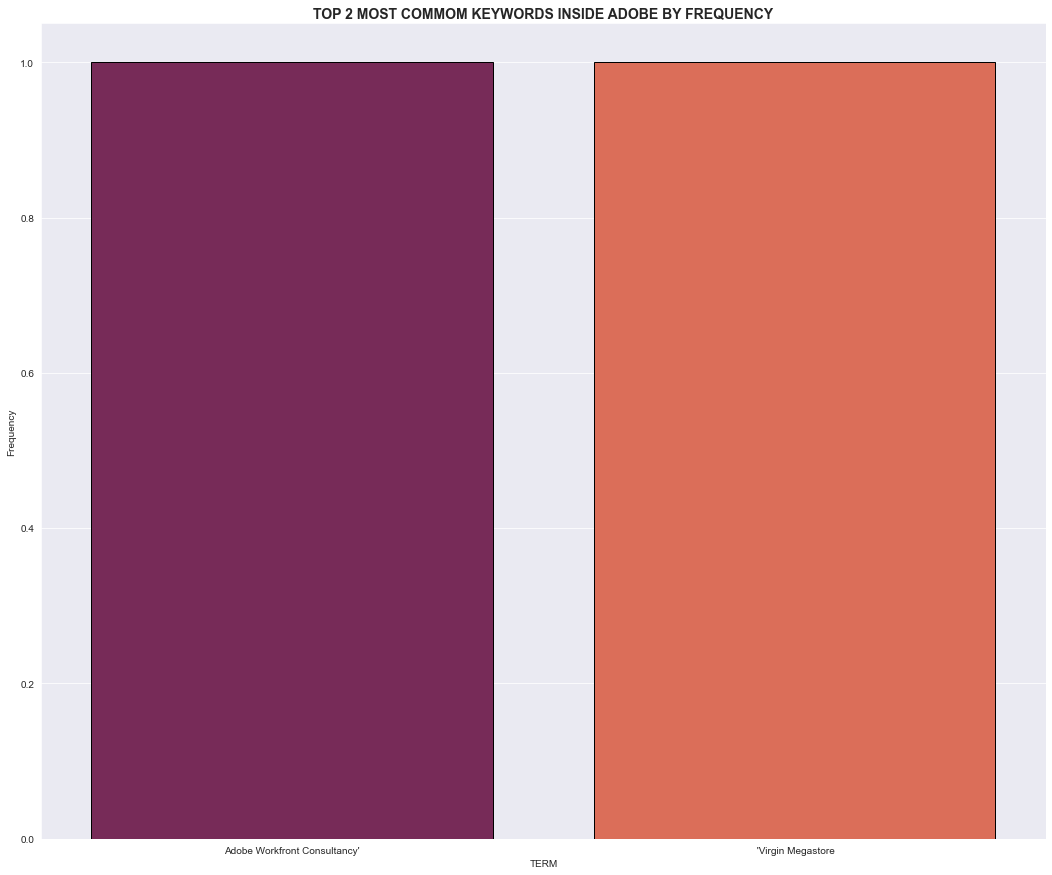

In [56]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff6[:8], 
    x=dff6.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 2 MOST COMMOM KEYWORDS INSIDE ADOBE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'sixth_most_commom_keyword.png'
)